In [2]:
# copyright ############################### #
# This file is part of the Xtrack Package.  #
# Copyright (c) CERN, 2021.                 #
# ######################################### #


import ducktrack as dtk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from tqdm import tqdm

import xtrack as xt
import xobjects as xo
import xpart as xp


beta_rel = 0.305
#beta_rel = 0.106

gamma = 1.050
#gamma = 1.006


current=2.4
length = 1.5 # m cooler length
r_beam=25*1e-3

mass0=938.27208816*1e6 #ev/c^2

T_perp = 100e-3 # <E> [eV] = kb*T
T_l =  1e-3 # <E> [eV]
B = 0.060 # T for AD
B_ratio=1e-10
Z=1


c=299792458.0

p0c = mass0*beta_rel*gamma #eV/c



circumference = 182.43280000000 #m
T = circumference/(c*beta_rel)
s_per_turn = T


beta_x=10 
beta_y=4

disp_x=0.12
#disp_x=0

arc=xt.LinearTransferMatrix(Q_x=5.44, Q_y=5.42,
                            beta_x_0=beta_x, beta_x_1=beta_x,
                            beta_y_0=beta_y,  beta_y_1=beta_y,
                            alpha_x_0=0,   alpha_x_1=0,
                            alpha_y_0=0,   alpha_y_1=0,
                            disp_x_0=disp_x,disp_x_1=disp_x,
                            disp_y_0=0,    disp_y_1=0,
                            beta_s=1*1e40,
                            Q_s=0,
                            chroma_x=0.0, chroma_y=0)
                                        



dtk_cooler = dtk.elements.ElectronCooler(current=current,length=length,r_beam=r_beam,
                                         T_perp=T_perp,T_l=T_l,
                                         B=B,B_ratio=B_ratio,
                                         Neutralisation_space_charge=0,Neutralisation_rotation=0)                

In [4]:
r=np.arange(start=-20*1e-3, stop=20*1e-3, step=1e-3)


#for r in r:

dE_E = (1.2e-4*current/(beta_rel**3))*(r/r_beam)**2


E = dtk_cooler.beta_to_kinetic_energy(beta_rel, dtk_cooler.me_ev)# + Pb_m0_MeV_c2 #Mev/c^2
E_diff = dE_E*E
E_tot = E + E_diff
beta2=dtk_cooler.kinetic_energy_to_beta(E_tot, dtk_cooler.me_ev)
#beta_ratio = beta2/beta
beta_diff = beta2-beta_rel

p0 = beta_rel*dtk_cooler.me_ev*gamma
p2 = beta2*dtk_cooler.me_ev*gamma

dp_p=(p2-p0)/p0

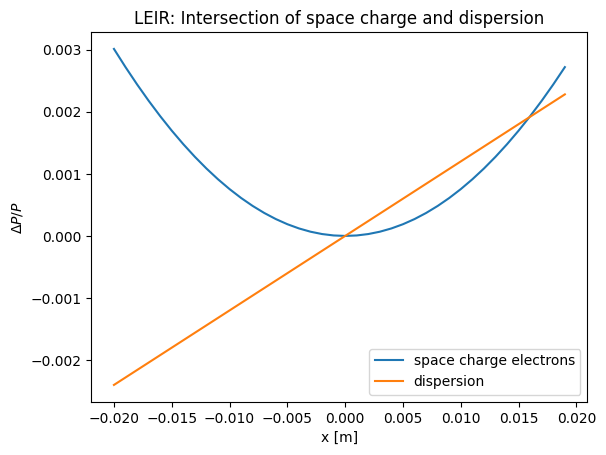

In [6]:
plt.figure()
plt.plot(r,dp_p,label='space charge electrons')
plt.plot(r,r*disp_x,label='dispersion')



# Find the intersection point by taking the average of the r values at the index where the two lines are closest
#intersection = np.mean(r[idx])

# Plot the intersection point as a vertical line
#plt.axvline(intersection, linestyle='--', color='k',label=f'x={intersection:.1e}')

plt.title('LEIR: Intersection of space charge and dispersion')
plt.xlabel('x [m]')
plt.ylabel('$\Delta P/P$')
plt.legend()

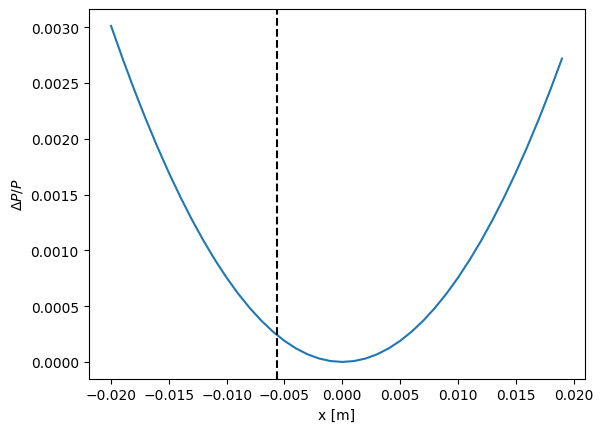

In [7]:
plt.figure()
plt.plot(r,dp_p)
#plt.plot(r,-10*r)

plt.xlabel('x [m]')
plt.ylabel('$\Delta P/P$')
# Find the index of the value in dp_p that is closest to each value in -10*r
idx = np.abs(dp_p - (-1/10*r[:,np.newaxis])).argmin(axis=1)

# Find the intersection point by taking the average of the r values at the index where the two lines are closest
intersection = np.mean(r[idx])

# Plot the intersection point as a vertical line
plt.axvline(intersection, linestyle='--', color='k')

# Display the plot
plt.show()
